# Optimized Model

The model that was chosen to execute the optimization was the Logistic Regression. In this notebook we will look for the best hyperparameters that can immprove the performance of this model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc,ConfusionMatrixDisplay,\
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve, fbeta_score, r2_score
from datetime import datetime

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Functions to be used
def evaluate_model(yval, ypred, ypred_proba = None):
    if ypred_proba is not None:
        print('ROC-AUC score of the model: {}'.format(roc_auc_score(yval, ypred_proba[:, 1])))
        print(f'\nF2 Score: {fbeta_score(yval, ypred, beta=2, average="macro")}\n')
        print(f'R2 Score: {r2_score(yval, ypred)}\n')
        print('Accuracy of the model: {}\n'.format(accuracy_score(yval, ypred)))
        print('Classification report: \n{}\n'.format(classification_report(yval, ypred)))
        
def cargar_modelo(ruta):
    return pickle.load(open(ruta, 'rb'))

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
          
def cargar_modelo(ruta):
    return pickle.load(open(ruta, 'rb'))

In [3]:
# Import the different datasets
x_train = cargar_modelo("../04_modelos/x_train.pickle")
y_train = cargar_modelo("../04_modelos/y_train.pickle")
x_test = cargar_modelo("../04_modelos/x_test.pickle")
y_test = cargar_modelo("../04_modelos/y_test.pickle")

# Optimized Logistic Regression

In [4]:
# Loading lightgbm model
LR = cargar_modelo("../04_modelos/LR_model.pickle")

In [5]:
LR = LogisticRegression()

In [6]:
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear', 'sag', 'saga']}
]

CV = GridSearchCV(LR, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [7]:
# Fit + simple timer function to know how long things take
start_time = timer(None) 
CV.fit(x_train, y_train)
timer(start_time) 

Fitting 5 folds for each of 120 candidates, totalling 600 fits

 Time taken: 1 hours 47 minutes and 36.65 seconds.


In [9]:
# Saving our model as a pickle
with open('../04_modelos/LR_optimized.pickle', 'wb') as f:
    pickle.dump(CV, f)

In [10]:
# Best hyperparameters and scoring
print('\n Best hyperparameters:')
print(CV.best_params_)
print('\n Best score:')
print(CV.best_score_)


 Best hyperparameters:
{'C': 1.623776739188721, 'penalty': 'l2', 'solver': 'liblinear'}

 Best score:
0.9703549060542798


In [11]:
# Predictions and evaluation
ypred = CV.predict(x_test)
ypred_proba = CV.predict_proba(x_test)
evaluate_model(y_test, ypred, ypred_proba)

ROC-AUC score of the model: 0.9919097710589384

F2 Score: 0.9542276707209567

R2 Score: 0.8286444231182652

Accuracy of the model: 0.9728297523846228

Classification report: 
              precision    recall  f1-score   support

         1.0       0.94      0.92      0.93      2051
         5.0       0.98      0.99      0.98      8328

    accuracy                           0.97     10379
   macro avg       0.96      0.95      0.96     10379
weighted avg       0.97      0.97      0.97     10379




Text(0.5, 1.0, 'Matriz normalizada del modelo Logistic Regression optimizado')

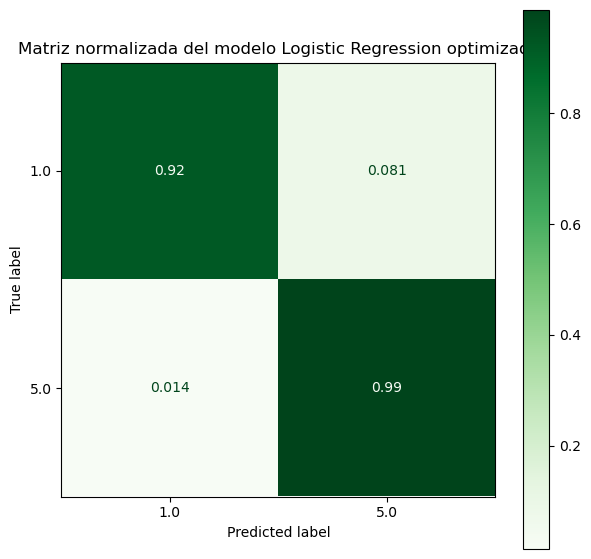

In [12]:
# Plotting optimized confusion matrix
fig, ax = plt.subplots(figsize=(7, 7))
disp = ConfusionMatrixDisplay.from_predictions(y_test, ypred,
                                                       cmap=plt.cm.Greens,
                                                       normalize='true',
                                                       ax=ax)
ax.set_title('Matriz normalizada del modelo Logistic Regression optimizado')

### Conclusion

We can see that with the optimization our model improve in both accuracy and R2. The value of accuracy increased from the original model without optiimization from 96.50% to 97.27% after adjusting the hyperparameters. Also as mentioned, the R2 also improves from an original vallue of 77.94% in the model without optimization, to 82.80% after the hyperparameters.

What we can take from this scores is that the model is going to correctly predict the 97.27% of the reviews correctly.